
# Introduction

In this project, we will see how to train a logistic regression model. This is intended as an introduction to logistic regression. However, we will not go through the mathematical intuition of the model. 

We will be working with the Breast Cancer dataset, which contains some very detailed measurements of cells. Along with each observation of measurements, we have the diagnosis of the cell (malignant or not). Our goal is to train a model that will be able to predict whether or not a given cell is malignant given only its measurements.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns

## Import the data
Let's start exploring the dataset and get a feel of what it represents. We can, for example, see that all the variables in our dataset –except the ID and the diagnosis– are already of type float64, which means that they are numerical. This is great for our intitial intuition of using a logistic regression model. This is because the logistic regression model takes numerical values as input and outputs a binary classification value (yes/no value).

In [3]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Clean the data

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# drop id and empty column
data.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

In [8]:
# turn target variable into 1s and 0s
data.diagnosis =[1 if value == "M" else 0 for value in data.diagnosis]

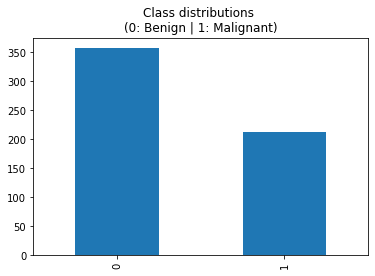

In [9]:
# turn the target variable into categorical data
data['diagnosis'] = data['diagnosis'].astype('category',copy=False)
plot = data['diagnosis'].value_counts().plot(kind='bar', title="Class distributions \n(0: Benign | 1: Malignant)")
fig = plot.get_figure()

# Logistic Regression

## Preprocessing

Once our dataset is clean that that we know that our variables are reliable, we can proceed to train our model. The first thing to do is to do is to separate the target variable (here called "y") and the predictors (here called "X"). Note that we use an uppercase X as convention in order to mymic the mathematical language. In mathematics, an uppercase symbol represents that the variable is multidimensional (a matrix).

In [10]:
# Prepare the model
y = data["diagnosis"] # our target variable
X = data.drop(["diagnosis"], axis=1) # our predictors

## Normalize the data

You might be tempted to use this data to perform the train-test split directly. But wait! The data is not yet normalized. This can be a problem, because the units of our variables are not necessarily in the same units. Also, there might be some outliers that could cause our model to perform badly. 

What we do in these cases is normalize the data before feeding it into our model. This will improve the performance of our machine learning algorithm. 

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array with normalized data

We then split the dataset into a training set and a testing set. Both have the same variables (columns), but different observations (rows). To do this, we use a very conveninent Scikit-Learn function called `train_test_split`. This function takes our predictors and our target variable and splits them into a testing set and a training set randomly. It returns 4 values:

- The predictors of our training set. We store this in a python variable that we call `X_train`.
- The targets of our training set. We will store them in a python variable that we call `y_train`. 
- The predictors of our testing set. We will store them in a python variable that we call `X_test`.
- The targets of our testing set. We will store them in a python variable that we call `y_test`. 

In them, each observation (row) in `X` corresponds to the target value in `y`.

Other parameters that our function `train_test_split` takes are `test_size` and `random_state`:
- `train_test_split` sets the size of our `X_test` and its `y_test`. 
- `random_state`, which is an arbitrary integer that will allow us to replicate the split if we ever need to perform the exact random split again. We usually choose 42 because it is the answer to everything.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)

## Evaluate the model

In this notebook, we have trained a logistic regression model to predict the target variable using a dataset of input features. As you can see here, after training the model on the training set and evaluating its performance on the test set, we achieved a final accuracy of 0.98. This is a strong performance and indicates that the model is able to make accurate predictions on new, unseen data. 

However, it's important to note that accuracy is just one measure of a model's performance, and it may not be the most appropriate measure for all problems. Depending on the problem and the specific requirements of the application, other metrics such as precision, recall, or F1 score may be more relevant. In the second cell, we use the `classification_report` function from `Scikit-learn` to calculate those measures. 

In [14]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# Conclusion

We have finished our analysis. We have used the data from the open dataset Breast Cancer in order to build a model that will predict if a given cell is malicious or not given certain measurements of its nucleus. This model, now that it is trained, can, evidently, be extremely useful to perform punctual analysis on given cells for a hospital.

However, since the model is easily callable in a python function to make predictions, this kind of model can easily be added to a server technology such as Flask and serve a front-end application that doctors can use. For example, we could build an interface where a doctor inputs some measurements that she has performed and the model would output if the cell is malicious or not. Or maybe, a more realistic use of this model could be to connect the backend application to a machine that takes a sample of tissue, measures all the cells and the performs a diagnosis. 

By using python, the API of such an application would extremely minimalist, and all we did to save the lives of people was train a logistic regression model on the hospital's data.